# Book Recommendation System 


# Problem Statement
In today's vast sea of literature, readers often struggle to discover books that align with their interests and preferences. As a result, there is a growing demand for personalized book recommendation systems that can assist users in finding relevant and enjoyable reading material. The objective of this project is to develop a machine learning-based book recommendation system that can suggest books tailored to the individual tastes and preferences of users.

# Dataset

* **Users** 

Contains the users.Demographic data is provided (Location, Age) if available.

* **Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

* **Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

# Data Preprocessing
Preprocessing in a book recommendation system involves several steps to ensure data quality and relevance. This includes dropping rows or columns with missing values, replacing null values with the mean or median of the respective feature, and handling missing data through techniques like imputation or deletion. Additionally, unnecessary columns such as Image URL are removed to streamline the dataset. Furthermore, identifying unique ratings allows for a comprehensive understanding of user preferences and enables accurate recommendation model training. These preprocessing steps lay the foundation for effective feature engineering and model development in book recommendation systems.

In [1]:
#IMPORTING LIBRARIES
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

**Book Data (Dataset)**

In [2]:
book_data = pd.read_csv("Books.csv")
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,380000059,CLOUT,D. GIBBONS,2024,Avon,http://images.amazon.com/images/P/0380000059.0...,http://images.amazon.com/images/P/0380000059.0...,http://images.amazon.com/images/P/0380000059.0...
1,590085417,Heidi,Johanna Spyri,2021,Scholastic,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...
2,068160204X,The Royals,Kitty Kelley,2020,Bausch &amp; Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...
3,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020,Bausch &amp; Lombard,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...
4,068471941X,LOOK HOMEWARD ANGEL,T Wolfe,2020,Scribner Paper Fiction,http://images.amazon.com/images/P/068471941X.0...,http://images.amazon.com/images/P/068471941X.0...,http://images.amazon.com/images/P/068471941X.0...


In [3]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')


In [4]:
book_data.shape

(271345, 8)

In [5]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271345 entries, 0 to 271344
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271345 non-null  object
 1   book_title           271345 non-null  object
 2   book_author          271344 non-null  object
 3   year_of_publication  271345 non-null  int64 
 4   publisher            271343 non-null  object
 5   image_url_s          271345 non-null  object
 6   image_url_m          271345 non-null  object
 7   image_url_l          271345 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [6]:
book_data.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            0
dtype: int64

In [7]:
#dropping null values
book_data.dropna(subset=['publisher', 'book_author'], inplace=True)

In [8]:
# droping the url
book_data.drop(['image_url_s' ,'image_url_m','image_url_l'], axis=1, inplace= True)

In [9]:
book_data.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [10]:
book_data.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,380000059,CLOUT,D. GIBBONS,2024,Avon
1,590085417,Heidi,Johanna Spyri,2021,Scholastic
2,068160204X,The Royals,Kitty Kelley,2020,Bausch &amp; Lombard
3,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020,Bausch &amp; Lombard
4,068471941X,LOOK HOMEWARD ANGEL,T Wolfe,2020,Scribner Paper Fiction


In [11]:
# getting unique value from 'year_of_publication' feature
book_data['year_of_publication'].unique()

array([2024, 2021, 2020, 2012, 2011, 2010, 2008, 2006, 2005, 2004, 2003,
       2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992,
       1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981,
       1980, 1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970,
       1969, 1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959,
       1958, 1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948,
       1947, 1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937,
       1936, 1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926,
       1925, 1924, 1923, 1922, 1921, 1920, 1919, 1917, 1914, 1911, 1910,
       1909, 1908, 1906, 1904, 1902, 1901, 1900, 1897, 1806, 1378, 1376,
          0], dtype=int64)

**User Data (Dataset)**

In [12]:
users_data= pd.read_csv('Users.csv')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [13]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
users_data.shape

(278858, 3)

In [15]:
users_data.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [16]:
#handling NaN values in Age column
# unique value in age
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [17]:
# replacing nan with average of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

**Ratings Data (Dataset)**

In [18]:
ratings_data = pd.read_csv("Ratings.csv")
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [19]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [20]:
ratings_data.isnull().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [21]:
ratings_data.shape

(1149780, 3)

In [22]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
3,276729,052165615X,3
5,276733,2080674722,0
8,276744,038550120X,7
13,276746,055356451X,0
...,...,...,...
1149747,276688,1575660792,7
1149748,276688,1580600506,0
1149769,276704,059032120X,0
1149772,276704,080410526X,0


In [23]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(196817, 3)


In [24]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  3,  7,  8, 10,  9,  6,  1,  5,  4,  2], dtype=int64)

# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is a crucial step in understanding the underlying patterns, relationships, and characteristics of the dataset. It involves visualizing and summarizing data to uncover insights and inform subsequent analyses.

Here, EDA includes generating graphs to depict various aspects such as the count of ratings, distribution of ratings across books, the frequency of authors and their respective number of books, the number of books published over time, rating count per book, and explicit ratings distribution. These visualizations provide valuable insights into user preferences, book popularity, and overall dataset characteristics, helping in the development of effective book recommendation algorithms.

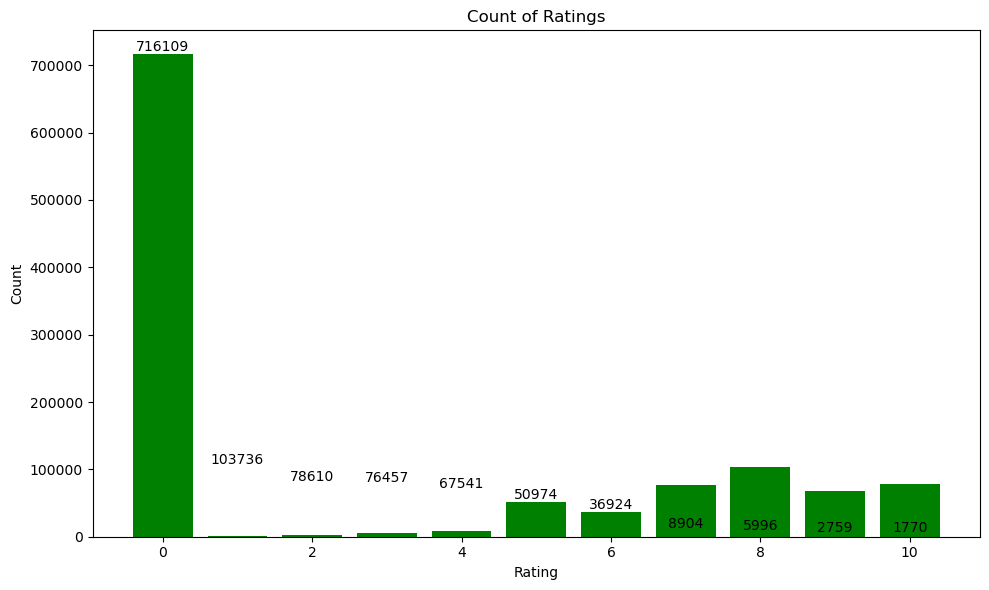

In [25]:
#count of ratings
rating_types = ratings_data['book_rating'].value_counts()

# Extracting x (rating values) and y (count of each rating)
x = rating_types.index
y = rating_types.values

plt.figure(figsize=(10, 6))
plt.bar(x, y, color='green')

for i, value in enumerate(y):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks()
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 20 author with number of books')

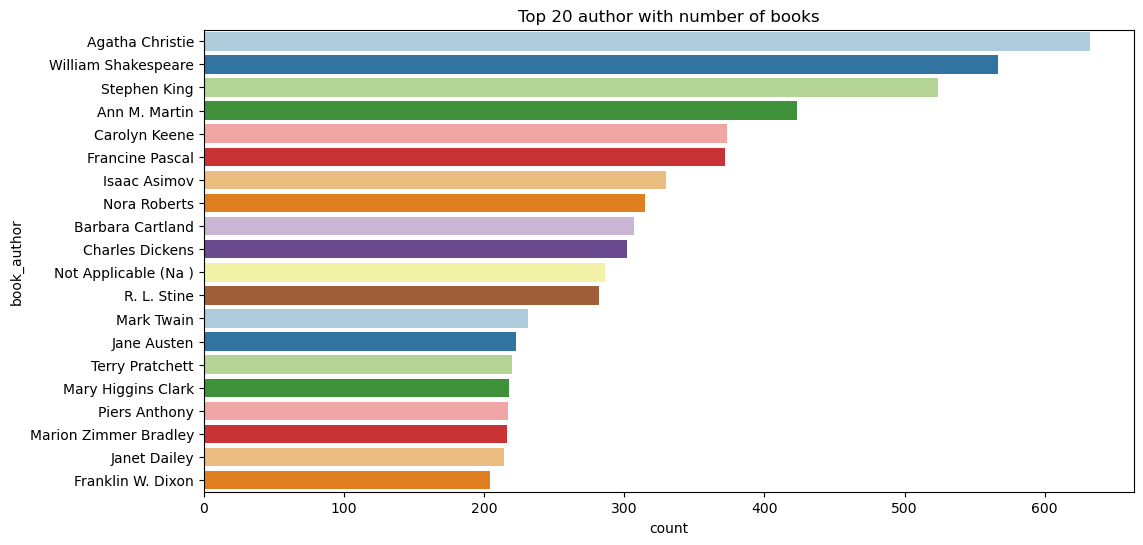

In [26]:
#top Author with number of books 
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

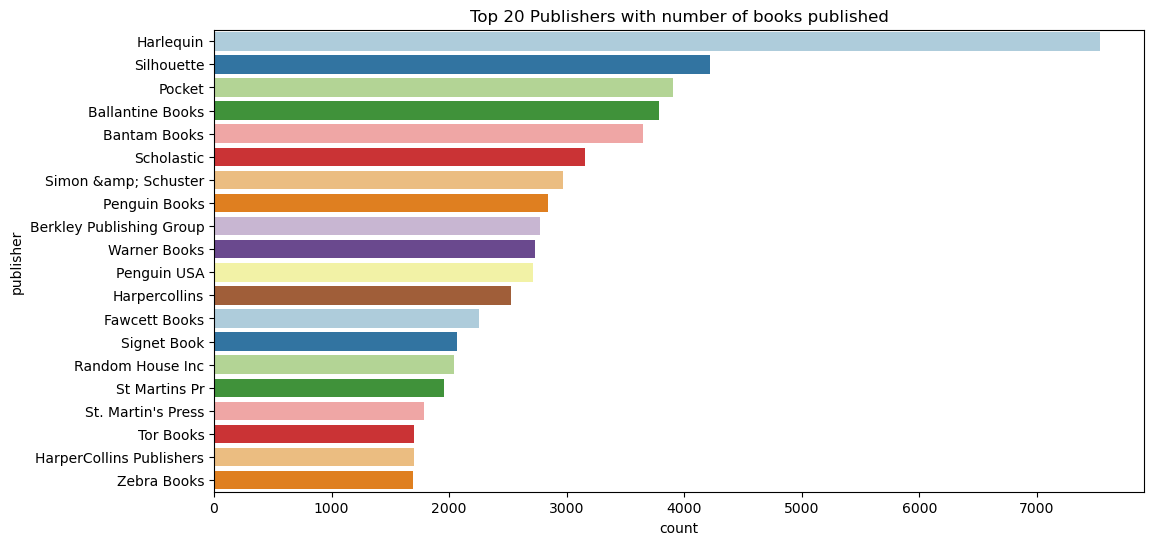

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

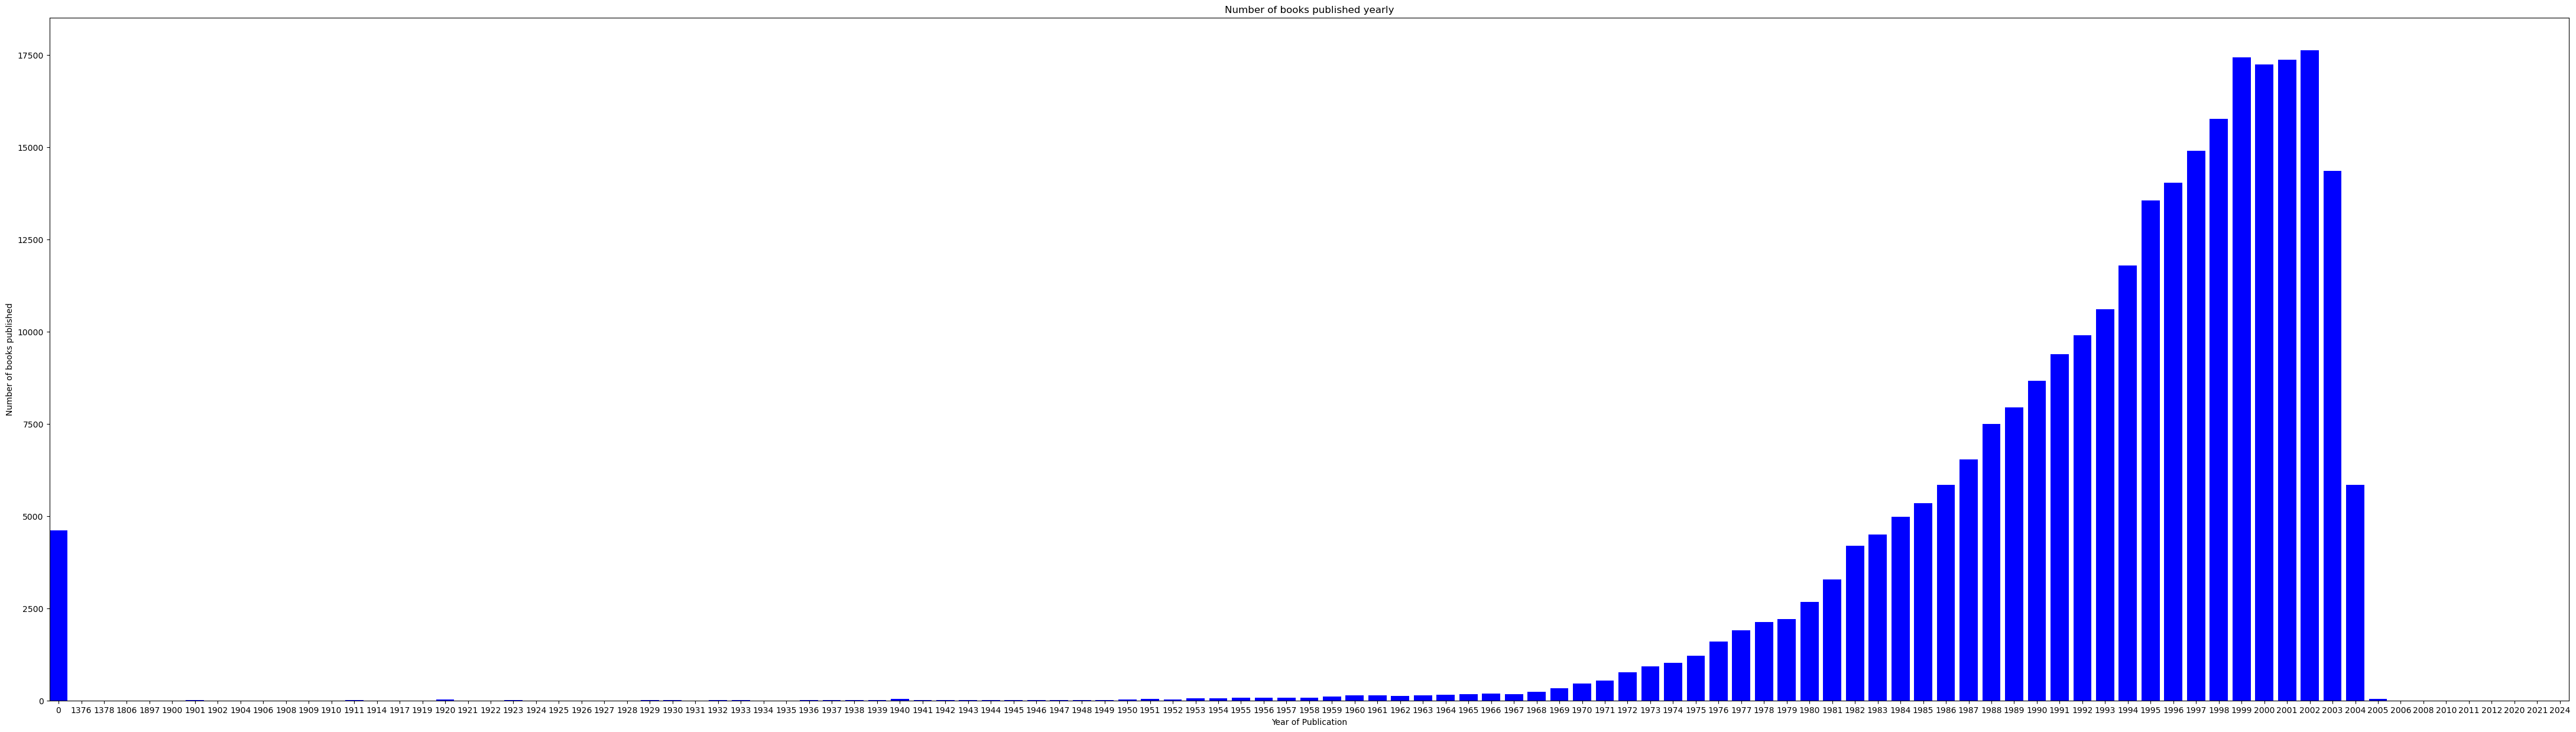

In [28]:
#No. of books published yearly
publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [29]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


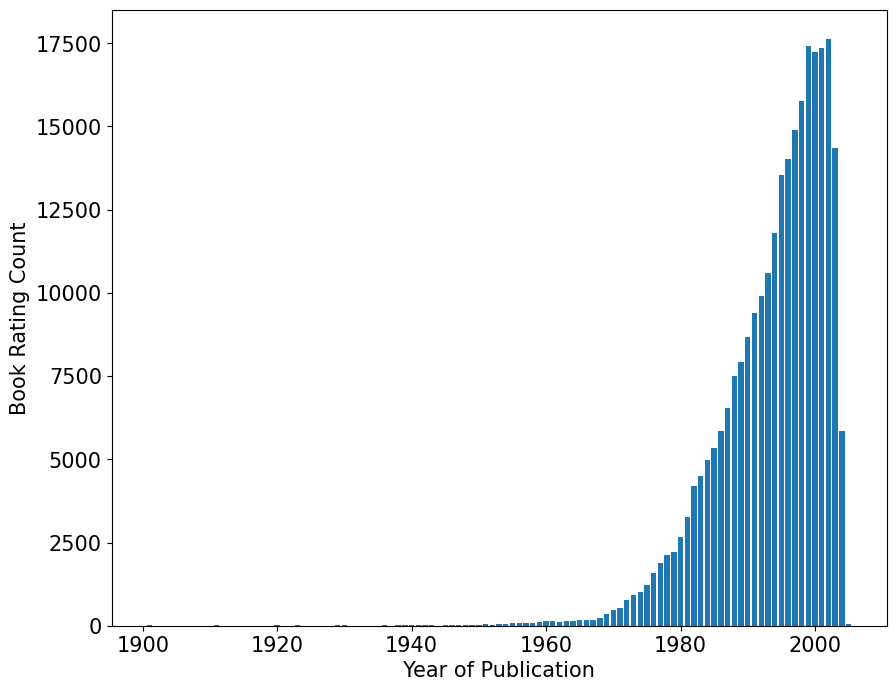

In [30]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('Book Rating Count')
plt.show()

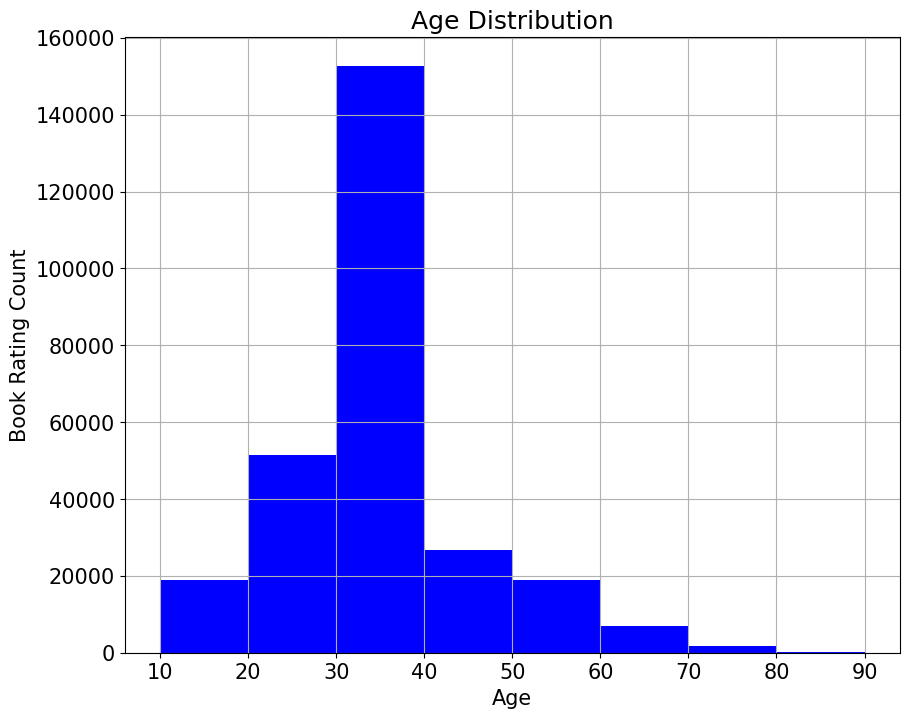

In [31]:
plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'BLUE')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Book Rating Count')
plt.show()

<Axes: xlabel='book_rating', ylabel='count'>

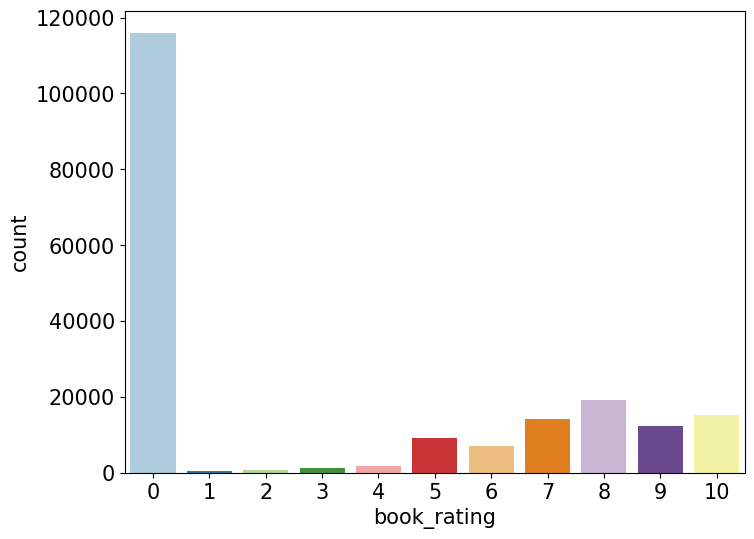

In [32]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

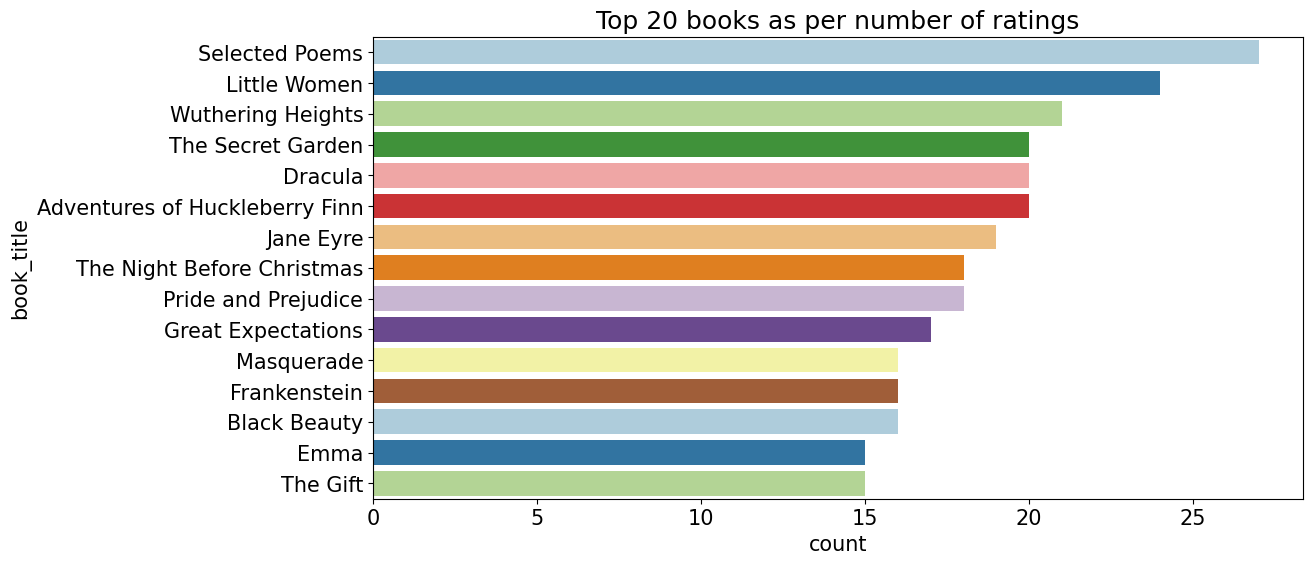

In [33]:
#top 20 books as per number of ratings
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

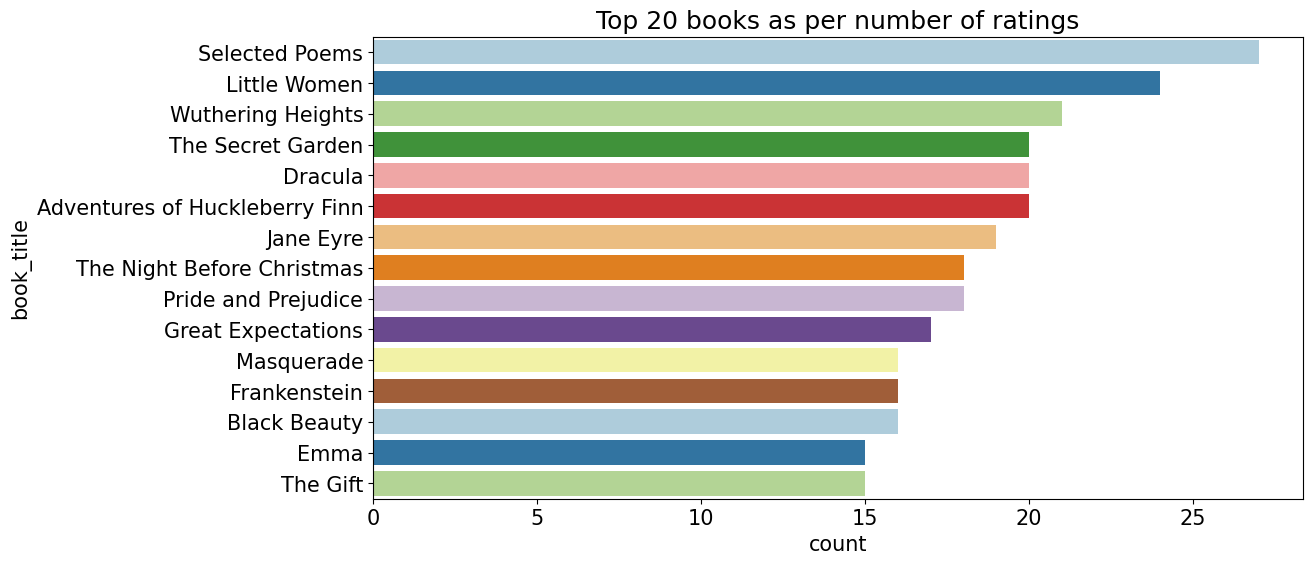

In [34]:
#top 20 books as per number of ratings
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

Text(0.5, 1.0, 'Explicit Ratings')

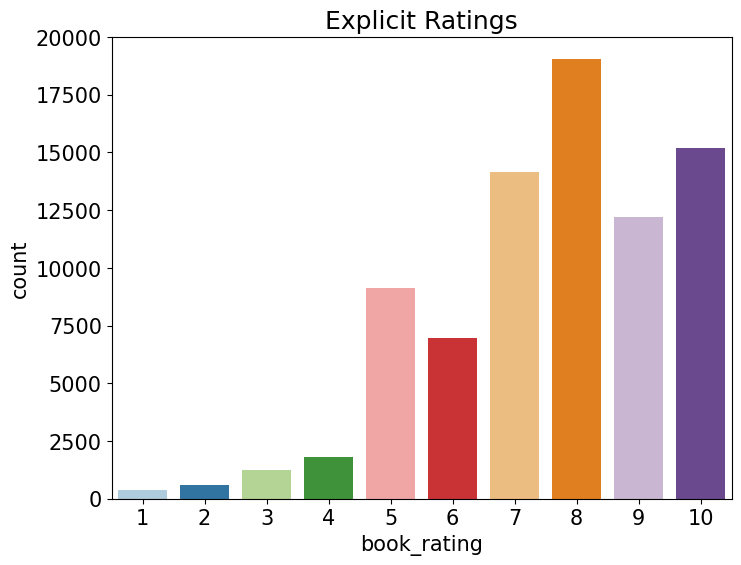

In [35]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

# Recommendation System
A recommendation system is a type of information filtering system that predicts and suggests items or content based on user preferences and behavior.Recommendation systems are commonly used in various domains such as e-commerce, streaming services, and content platforms to personalize recommendations and improve user satisfaction.

The book recommendation system utilizes a weighted average rating method to provide personalized book recommendations. Initially, it displays the top ten books based on their ratings, offering users an overview of highly-rated books. Then, employing the method, it calculates rating values for each book, considering both the average rating and the number of ratings received.

Subsequently, a user-input function is implemented, allowing users to specify a book and the number of recommendations desired. This function returns top books by the same author as well as similar books based on their ratings, enabling users to explore relevant reading material tailored to their preferences and interests.

In [36]:
#Separate explicit ratings and implicit ratings
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

In [37]:
ratings_explicit.head()

,user_id,isbn,book_rating
3,276729,052165615X,3
8,276744,038550120X,7
23,276747,1885408226,7
27,276751,3596218098,8
44,276762,3453092007,8


In [38]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(196817, 3)
(80796, 3)


In [39]:
# Merging book_data dataset and ratings_explicit
df= pd.merge(book_data, ratings_explicit, on='isbn')
df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,068160204X,The Royals,Kitty Kelley,2020.0,Bausch &amp; Lombard,169736,7
1,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020.0,Bausch &amp; Lombard,204964,8
2,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020.0,Bausch &amp; Lombard,267830,8
3,1903436346,The Winter's Tale - Arden Shakespeare : Third ...,John Pitcher,2006.0,Arden,76626,9
4,1881273156,The Five Love Languages: Five Love Languages,Gary Chapman,2005.0,Moody Publishers,11676,8


In [40]:
print(df.shape)

(80796, 7)


In [41]:
df['book_title'].count()

80796

In [42]:
df['book_title'].nunique()

40078

In [43]:
# top ten books as per book ratings and recommendation
top_ten_books= pd.DataFrame(df.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten books as per ratings : ')
top_ten_books

The top ten books as per ratings : 


,book_rating
book_title,
A Painted House,363
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),315
Snow Falling on Cedars,260
The Firm,210
Harry Potter and the Order of the Phoenix (Book 5),207
The No. 1 Ladies' Detective Agency (Today Show Book Club #8),183
The Bridges of Madison County,153
How to Be Good,150
The Rainmaker,140


# Weighted average rating method
Using Weighted average for each Book’s Average Rating

W = (Rv + Cm)/(v + m)

where

W= Weighted Rating

R = Average of the Books rating

v = No of people who have rated the books(number of votes)

m = minimum no of votes to be listed

C = the mean rating across all the books

In [46]:
#finding the average rating and number of votes received by books
df_relevant_data = df.groupby(['book_title','book_author'],as_index=False).agg(avg_rating=('book_rating','mean'),ratings_count=('book_rating','count'))
v=df_relevant_data['ratings_count']
R=df_relevant_data['avg_rating']
C=df_relevant_data['avg_rating'].mean()
m=int(df_relevant_data['ratings_count'].quantile(0.90))#minimum number of votes to be listed
print(f'The average rating of all the books is {C} and the minimum number of votes required by the books to be listed is {m}  ')

The average rating of all the books is 7.523369209185648 and the minimum number of votes required by the books to be listed is 3  


In [47]:
#Calculating weighted average rating of the books
df_relevant_data['weighted_average']=round(((R*v)+ (C*m))/(v+m),2)

In [48]:
df_relevant_data.sort_values(by='weighted_average',ascending=False).head(10)

,book_title,book_author,avg_rating,ratings_count,weighted_average
26423,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,10.000000,11,9.47
37658,Uncle John's Supremely Satisfying Bathroom Rea...,Bathroom Readers Institute,10.000000,7,9.26
24047,Natural California: A Postcard Book,Not Applicable (Na ),10.000000,7,9.26
27099,Ranma 1/2 (Ranma 1/2),Rumiko Takahashi,9.700000,10,9.20
22389,Maus 1. Mein Vater kotzt Geschichte aus. Die G...,Art Spiegelman,9.700000,10,9.20
14875,Hatchet,Gary Paulsen,9.583333,12,9.17
27283,Redeeming Love,Francine Rivers,9.466667,15,9.14
14841,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,9.228070,57,9.14
14827,Harry Potter Und Der Feuerkelch,Joanne K. Rowling,9.600000,10,9.12
31913,The Cat in the Hat,Dr. Seuss,9.242424,33,9.10


In [65]:
def author_based(book_title, number, df_relevant_data):
    
#Recommends books from the same author as the book entered by the user
    
    if book_title not in df_relevant_data['book_title'].values:
        return f"Book '{book_title}' not found in the dataset."

    author = df_relevant_data.loc[df_relevant_data['book_title'] == book_title, 'book_author'].iloc[0]
    author_df = df_relevant_data.loc[df_relevant_data['book_author'] == author].sort_values(by='weighted_average', ascending=False)
    
    print(f"The author of the book '{book_title}' is '{author}'\n")
    
    print(f"Here are the top books from the same author\n")
    
    # Top books from the same author
    top_author_books = author_df.loc[author_df['book_title'] != book_title, ['book_title', 'weighted_average']].head(number)
    print("Top books from the same author:")
    print(top_author_books)
    
    print(f"\nHere are the top recommended books similar to '{book_title}'\n")
    
    # Top recommended books
    if len(author_df) <= 1:
        top_rec = author_df[['book_title', 'weighted_average']]
    else:
        top_rec = author_df[['book_title', 'weighted_average']].head(number)
    
    print("Top recommendations:")
    print(top_rec)
    
author_based("The Cat in the Hat", 5, df_relevant_data)


The author of the book 'The Cat in the Hat' is 'Dr. Seuss'

Here are the top books from the same author

Top books from the same author:
                                              book_title  weighted_average
15597  Hop on Pop (I Can Read It All by Myself Beginn...              8.71
15642                             Horton Hatches the Egg              8.65
31226                The 500 Hats of Bartholomew Cubbins              7.64

Here are the top recommended books similar to 'The Cat in the Hat'

Top recommendations:
                                              book_title  weighted_average
31913                                 The Cat in the Hat              9.10
15597  Hop on Pop (I Can Read It All by Myself Beginn...              8.71
15642                             Horton Hatches the Egg              8.65
31226                The 500 Hats of Bartholomew Cubbins              7.64


In [51]:
# we kept running into memory issues, so decided to reduce some data by filtering things out
# focussing on users with more than 3 ratings and top 10% most frequently rated books
required_ratings = 3

user = df['user_id'].value_counts()
user_list = user[user >required_ratings].index.to_list()
filter_df = df[df['user_id'].isin(user_list)]

print('Number of users with ratings more than 3 are: {}'.format(filter_df.shape[0]))
     

Number of users with ratings more than 3 are: 51193


In [52]:
# top 10% most frequently rated books
required = len(filter_df.isbn.unique()) * 0.1

user_list = filter_df['book_title'].value_counts().head(int(required)).index.to_list()
filter_df = filter_df[filter_df['book_title'].isin(user_list)]

print('Number of top 10% users are: {}'.format(filter_df.shape[0]))

Number of top 10% users are: 19500


In [53]:
# shape of final dataset
filter_df.shape

(19500, 7)